## IMPORTING IMPORTANT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The libraries which I will extensively use in this **Exploratory Data Analysis** are **Pandas , Numpy, Matplotlib** and **Seaaborn** which are imported with aliases **pd, npn plt** and **sns** respectively

## IMPORTING THE DATAFRAME

Next step is to import the data which was downloaded and converting it into a pandas dataframe

In [150]:
df = pd.read_csv(r'C:\Users\hp world\Downloads\train_LZdllcl.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


### Checking shape and other basic information of the dataframe

In [151]:
df.shape

(54808, 14)

So the  dataframe contains **54808** rows and **14** columns

Next I will try to explore a little  more about the dataframe and its variables

In [152]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


So by the runnung the above peiece of code I extensively got the information about the count of each variable and their data types. Here it can be  seen that the  variable  **education** has 52399 rows and the variable **previous_year_rating** has 50684 rows filled out of the total 54808 rows which means that these variables have somewhat 2000 and 4000 missing values in them. The exact number can be found out by running the following piece of code.

### Checking for missing values 

In [153]:
df.isnull().sum()   #gives the total  number of missing values column  wise

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

So after this I can say that all the variables other than **education and previous_year_rating** has no missing values and as for these two variables the count is **2409 and 4121** respectively

Now as my final aim is to develope a machine learning model that tells me, given the parameters whether an employee will be promoted in the company or not, so I will have to come up with a way to immpute the missing values so  as to be able to smoothly develope a machine learning classification model out  of it

### Imputation of missing values

Normally there are several ways to impute the missing values one such being that I can impute the missing values by the values of central tendency (mean,median,mode) . But this method is not very reliable as it can introduce bias in the data set. Normally this method is preferred where the number of rows is less

Again there are methods of imputing the missing values by using ML algorithms like KNN which is quite accurate but as it is a computationally expensive method, I have avoided that here as well.

Here I have used a method which I named **Random Imputation**, wherein I have developed a function named **random_imputation** which takes the concerned dataframe and the feature in which missing value is present, and then randomly imputates the missing values with values that are not missing in that particular feature

#### Random imputation

First I have created a list of the features which contains missing values and named it **missing_columns**

In [8]:
missing_columns = ['education', 'previous_year_rating']   # The features in which missing values are present

In [9]:
def random_imputation(data_frame, feature):

    number_missing = data_frame[feature].isnull().sum()   ##Gives the total number of rows that are missing in the feature
    observed_values = data_frame.loc[data_frame[feature].notnull(), feature]     # Provides all the observations that are not missing in the dataframe
    data_frame.loc[data_frame[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    # FInally the above line of code replaces the missing values with random values from the feature which has missing values  \
    # for this purpose random.choice function fromm numpy is used
    return data_frame

Finally a loop is run on **missing_column** and the **random_imputation** function is called on the df dataframe and the new dataframe is stored with the name **df1** 

In [10]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df1 = random_imputation(df, feature)

#### Checking for missing values in the new dataframe

In [15]:
df1['education'] = df1['education_imp']
df1['previous_year_rating'] = df1['previous_year_rating_imp']

In [18]:
df1 = df1.drop(['education_imp','previous_year_rating_imp'],axis = 1)

In [19]:
df1.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

Finally as it can be seen that the new dataframe df1 doesnot contain any missing value. So now it can be considered  for further analysis

### Replacing values in few variables

For the ease of analysis I will repalce a few values of few variables, as it can be seen from the code below and will store the edited dataframe by the name of **df2** on which further analysis will be  performed

In [29]:
df2 = df1
df2 = df2 = df1.replace({'KPIs_met >80%':{0:'Not_good',1:'Good'},'awards_won?':{0:'No',1:'Yes'},'is_promoted':{0:'NO',1:'YES'},'gender':{'f':'female','m':'male'}})
df2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,female,sourcing,1,35,5.0,8,Good,No,49,NO
1,65141,Operations,region_22,Bachelor's,male,other,1,30,5.0,4,Not_good,No,60,NO
2,7513,Sales & Marketing,region_19,Bachelor's,male,sourcing,1,34,3.0,7,Not_good,No,50,NO
3,2542,Sales & Marketing,region_23,Bachelor's,male,other,2,39,1.0,10,Not_good,No,50,NO
4,48945,Technology,region_26,Bachelor's,male,other,1,45,3.0,2,Not_good,No,73,NO


## UNIVARIATE ANALYSIS

As the name suggests, **Univariate Analysis** means to analyse one variable at a time

In [23]:
df2.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.327799,5.865512,63.386750
std,22586.581449,0.609264,7.660169,1.259313,4.265094,13.371559
min,1.000000,1.000000,20.000000,1.000000,1.000000,39.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,51.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,60.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,76.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,99.000000


The output of the above code gives a brief description of the variables which contains numerical values. Out of which few are continuous and few are discrete in nature. We can get some good insights from this. Like the average training score of the employees in the current year is 63.38 approx which can be seen from the  mean section under **avg_training_score**

Also from the above table a rough idea about the outliers in the dataset can be formed. For each variable if the differnce between the mean and  median is high, we can conclude, that variable has got outliers.(Median is the row where index is 50%). Here in the above table it can be seen that the difference between mean and median is not that  high for any variable and so we can conclude that the dataset has not got any outliers

### Department

In [24]:
print(df2.department.value_counts())
print("*********************************************************")
print(df2.department.value_counts()/df2.department.count())

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
*********************************************************
Sales & Marketing    0.307254
Operations           0.207050
Procurement          0.130236
Technology           0.130236
Analytics            0.097650
Finance              0.046271
HR                   0.044118
Legal                0.018957
R&D                  0.018227
Name: department, dtype: float64


By analying the **department** variable it can be seen that almost **31%** of the total employees work in the **Sales & Marketing** department, whereas almost **21%** of the employees in the company work in the **Operations** department and so on. Only a meagre **1.9% and 1.8%** of the total workforce work in the **Legal and R&D** sectorsin the company

The count of employees in each department is visualized below with the help  of a **bar plot**

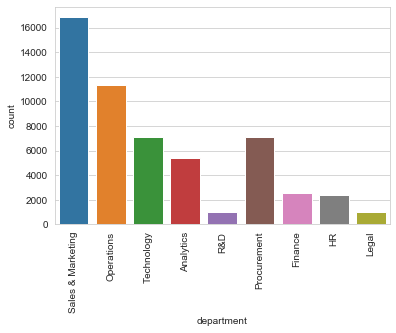

In [26]:
sns.set_style("whitegrid")
sns.countplot(x= 'department', data = df2)
plt.xticks(rotation = 90)
plt.show()

### Education

Now I want to know what is the educational background of the employees working in the company. This question can be answered as follows:

In [27]:
print(df2.education.value_counts())
print("*******************************************")
print(df2.education.value_counts()/df2.education.count())

Bachelor's          38358
Master's & above    15613
Below Secondary       837
Name: education, dtype: int64
*******************************************
Bachelor's          0.699861
Master's & above    0.284867
Below Secondary     0.015271
Name: education, dtype: float64


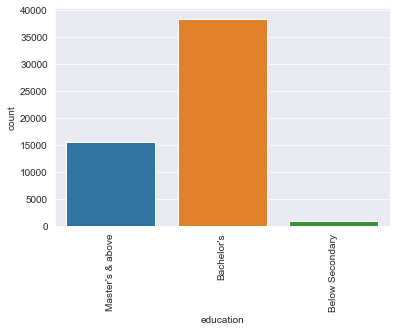

In [28]:
sns.set_style('darkgrid')
sns.countplot(x = 'education', data = df2)
plt.xticks(rotation = 90)
plt.show()

The maximum chunk of employees in the company has a **Bachelor's** degree(almost 70%) which is 38358 to be precise, 15613 people(almost 28.5%) have **Master's or above** degree and the remaining 837 people(1.5%) has got a degree which is **Below Secondary**

### Gender

Now lets look at the male to female ratio in the company's workforce population

In [30]:
print(df2.gender.value_counts())
print("***************************************")
print(df2.gender.value_counts()/df2.gender.count())

male      38496
female    16312
Name: gender, dtype: int64
***************************************
male      0.702379
female    0.297621
Name: gender, dtype: float64


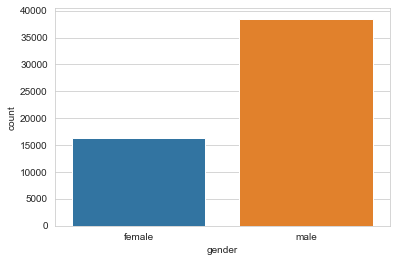

In [31]:
sns.set_style('whitegrid')
sns.countplot(x = 'gender', data = df2)

It can be seen that the ratio of female:male in the company is about 3:7 meaning almost 30% of the employees in the comapny are female and the rest 70% is male

### Recruitment Source

When a company recruits, it recruits from different channels. So what are the different recruitment channels in the company and how many people come rom these respective channels?

In [32]:
print(df2.recruitment_channel.value_counts())
print("*********************************************************")
print(df2.recruitment_channel.value_counts()/df2.recruitment_channel.count())

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64
*********************************************************
other       0.555503
sourcing    0.423661
referred    0.020836
Name: recruitment_channel, dtype: float64


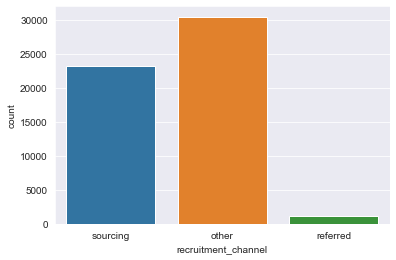

In [33]:
sns.set_style('darkgrid')
sns.countplot(x = 'recruitment_channel', data = df2)

It can be seen that  almost **55%** of the employees come from other sources whereas **42%** come via **sourcing** and only almost **2%** of the employees get hired on the basis of reference. So this means that references dont work that well here, you need to have real skills to get in this company

### No of Trainings

Here I have tried to find out how many trainings the employees did last year

In [34]:
print(df2.no_of_trainings.value_counts())
print("*******************************")
print(df2.no_of_trainings.value_counts()/df2.no_of_trainings.count())

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64
*******************************
1     0.809699
2     0.145727
3     0.032404
4     0.008539
5     0.002335
6     0.000803
7     0.000219
10    0.000091
9     0.000091
8     0.000091
Name: no_of_trainings, dtype: float64


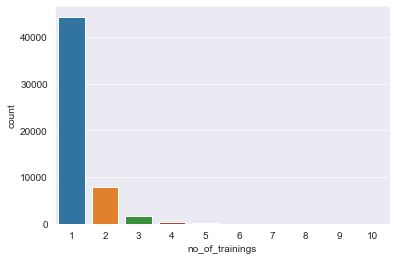

In [35]:
sns.set_style('darkgrid')
sns.countplot(x = 'no_of_trainings', data = df1)

By analying it can be seen that almost 81% off the employees have only training which seems to be  mandatory here. 14.5% of the employees took 2 trainings and the rest of the numbers are pretty meagre

### Age

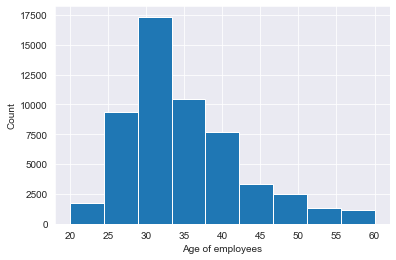

In [37]:
bins = np.linspace(df2.age.min(),df2.age.max(),10)
plt.hist(df2.age,bins = bins)
plt.xlabel('Age of employees')
plt.ylabel('Count')
plt.show()

From the above graph it can be said that the bulk workforce population of the company is pretty young with a lot of them residing in their late 20s or early 30s 

In [38]:
print("The average age of employees working in the company is {}".format(df2.age.mean()) + " which is approximately equal to {}".format(round(df2.age.mean())) )

The average age of employees working in the company is 34.80391548679025 which is approximately equal to 35


### Previous Year Rating

In [39]:
print(df2.previous_year_rating.value_counts())
print("*********************************************************")
print(df2.previous_year_rating.value_counts()/df2.previous_year_rating.count())

3.0    20157
5.0    12652
4.0    10697
1.0     6733
2.0     4569
Name: previous_year_rating, dtype: int64
*********************************************************
3.0    0.367775
5.0    0.230842
4.0    0.195172
1.0    0.122847
2.0    0.083364
Name: previous_year_rating, dtype: float64


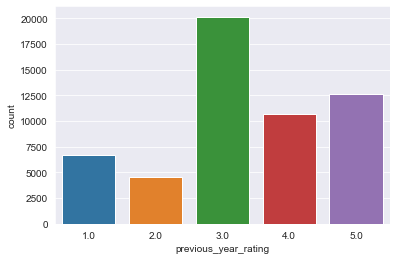

In [40]:
sns.set_style('darkgrid')
sns.countplot(x = 'previous_year_rating', data = df2)

The graph and the number shows that maximum people did pretty good in their training previous year with a bulk of them getting a raating of 3, 4 and 5

### Length Of Service

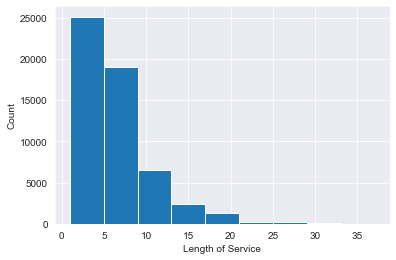

In [41]:
bins = np.linspace(df2.length_of_service.min(),df2.length_of_service.max(), 10)
plt.hist(df2.length_of_service, bins = bins)
plt.xlabel('Length of Service')
plt.ylabel('Count')

plt.show()

This graph shows that maximum of the employees in the company has an experience of 0-10 years in the company and very few employees  has been loyal to the  company for a period of more than 20 years which is the scenario in the corporate sector these days with employees preferring to switch very often than not 

In [1]:
print('The mean length of service of an employee in the company is {}'.format(df2.length_of_service.mean()) + 'which is approximately equal to {}'.format(round(df2.length_of_service.mean())))

NameError: name 'df2' is not defined

### Average Training Score

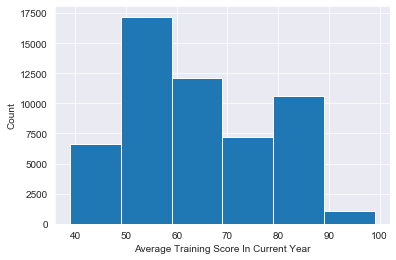

In [43]:
bins = np.linspace(df1.avg_training_score.min(),df1.avg_training_score.max(), 7)
plt.hist(df1.avg_training_score, bins = bins)
plt.xlabel('Average Training Score In Current Year')
plt.ylabel('Count')
plt.show()

In [44]:
print('The mean training score of an employee in the company in the current year is {}'.format(df1.avg_training_score.mean())) 

The mean training score of an employee in the company in the current year is 63.38675010947307


This is an above aevrage score, but the good thing for the company is that there is a significant amount of workforce who scored in the slab of 80-90 

### Key Performance Indicator

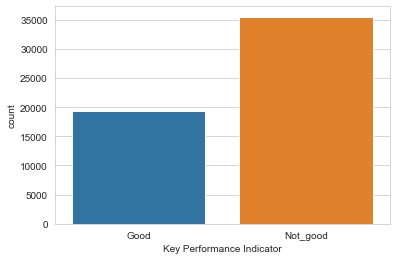

In [45]:
sns.set_style('whitegrid')
sns.countplot(x = 'KPIs_met >80%', data = df2)
plt.xlabel('Key Performance Indicator')

plt.show()

In [46]:
print(df2['KPIs_met >80%'].value_counts())
print("*********************************************************")
print(df2['KPIs_met >80%'].value_counts()/df2['KPIs_met >80%'].count())

Not_good    35517
Good        19291
Name: KPIs_met >80%, dtype: int64
*********************************************************
Not_good    0.648026
Good        0.351974
Name: KPIs_met >80%, dtype: float64


Almost 35% of the employees had their **Key Performance Indictor** above 80%

### Awards Won

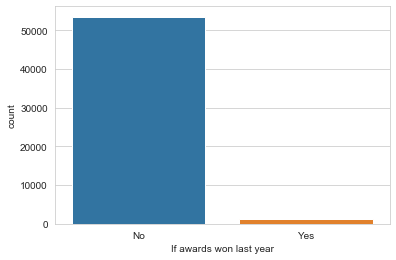

In [47]:
sns.set_style('whitegrid')
sns.countplot(x = 'awards_won?', data = df2)
plt.xlabel('If awards won last year')

plt.show()

In [48]:
print(df2['awards_won?'].value_counts())
print("*********************************************************")
print(df2['awards_won?'].value_counts()/df2['awards_won?'].count())

No     53538
Yes     1270
Name: awards_won?, dtype: int64
*********************************************************
No     0.976828
Yes    0.023172
Name: awards_won?, dtype: float64


From the above analysis it can be seen that almost 98% of the  employees did not win any award and only 2% of  them did,, this means  that  the company sets its standards really high and the employees have to push harder to get these numbers up

## BIVARIATE ANALYSIS

Analying two variables together to gather valuable trends from them and finding correlation between them

### Education Background Of Different Employees in different departments

In [49]:
edu_emp = pd.crosstab(df2['department'],df2['education'])
edu_emp

education,Bachelor's,Below Secondary,Master's & above
department,,,
Analytics,4213,2,1137
Finance,1922,106,508
HR,1549,129,740
Legal,817,65,157
Operations,7941,178,3229
Procurement,4439,131,2568
R&D,561,1,437
Sales & Marketing,12202,23,4615
Technology,4714,202,2222


The above table **edu_emp** shows the education background of different employees in the different departments for which the visualiation has been provided below.

Few of the key insights from this are:
**R&D** department has a good proportion of employees having master's degree in comparison to other departments

Although a small proportion but a lot of employees whose degree is Below Secondary are in the **Technology** department

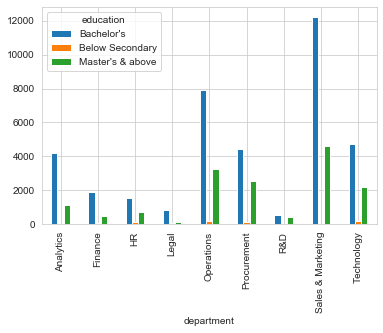

In [62]:
edu_emp.plot(kind = 'bar')


### Gender Ratio in different departments

In [55]:
rati = pd.crosstab(df2['department'], df2['gender'])
rati['ratio'] = rati['female']/rati['male']
rati

gender,female,male,ratio
department,,,
Analytics,513,4839,0.106014
Finance,681,1855,0.367116
HR,1006,1412,0.712465
Legal,149,890,0.167416
Operations,4677,6671,0.701094
Procurement,3287,3851,0.853545
R&D,57,942,0.060510
Sales & Marketing,3154,13686,0.230454
Technology,2788,4350,0.640920


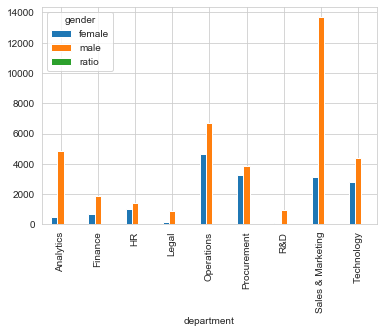

In [155]:
rati.plot.bar()

From the above analysis it can be said that most of the departments maintain a good gender ratio barring **Analytics, Legal, R&D and Sales and Marketing**

### Employees from different recruitment channels in different departments

In [63]:
recruit = pd.crosstab(df2['department'], df2['recruitment_channel'])
recruit

recruitment_channel,other,referred,sourcing
department,,,
Analytics,2973,83,2296
Finance,1463,5,1068
HR,1380,103,935
Legal,590,14,435
Operations,6279,238,4831
Procurement,4002,79,3057
R&D,555,19,425
Sales & Marketing,9290,259,7291
Technology,3914,342,2882


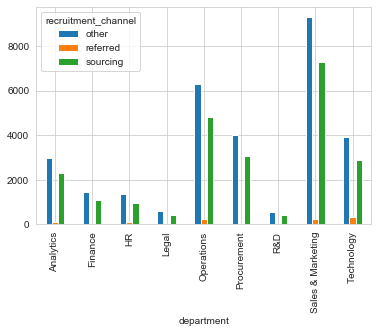

In [65]:
recruit.plot.bar()

### Employees having different number of trainings from different departments

In [66]:
training = pd.crosstab(df2['department'], df2['no_of_trainings'])
training

no_of_trainings,1,2,3,4,5,6,7,8,9,10
department,,,,,,,,,,
Analytics,3836,1256,228,32,0,0,0,0,0,0
Finance,1935,456,122,21,2,0,0,0,0,0
HR,2292,122,4,0,0,0,0,0,0,0
Legal,980,25,34,0,0,0,0,0,0,0
Operations,9769,1358,198,21,2,0,0,0,0,0
Procurement,5660,988,304,111,41,17,5,4,4,4
R&D,696,228,53,20,2,0,0,0,0,0
Sales & Marketing,13494,2458,600,187,67,25,6,1,1,1
Technology,5716,1096,233,76,14,2,1,0,0,0


In [2]:
training.plot.bar(width = 2)

NameError: name 'training' is not defined

### Employees having different ratings from different departments

In [73]:
rating = pd.crosstab(df2['department'], df2['previous_year_rating'])
rating

previous_year_rating,1.0,2.0,3.0,4.0,5.0
department,,,,,
Analytics,460,337,1962,1066,1527
Finance,203,146,1026,541,620
HR,204,180,940,473,621
Legal,107,80,407,197,248
Operations,761,726,3938,2581,3342
Procurement,733,612,3035,1283,1475
R&D,81,52,384,198,284
Sales & Marketing,3261,1743,5544,2822,3470
Technology,923,693,2921,1536,1065


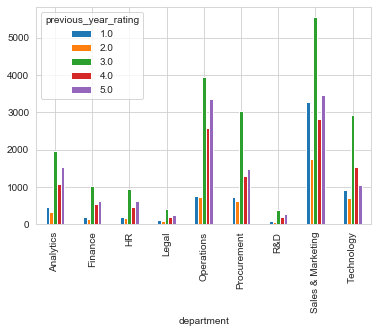

In [74]:
rating.plot.bar()

### Employees from different departments and having good KPI previous year

In [75]:
KPI = pd.crosstab(df2['department'], df2['KPIs_met >80%'])
KPI

KPIs_met >80%,Good,Not_good
department,,
Analytics,2163,3189
Finance,1052,1484
HR,808,1610
Legal,347,692
Operations,4888,6460
Procurement,2695,4443
R&D,416,583
Sales & Marketing,4464,12376
Technology,2458,4680


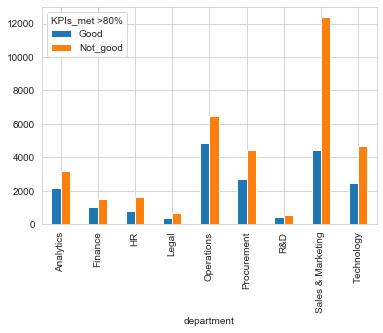

In [76]:
KPI.plot.bar()

### How many employees from different departments won awards last year

In [77]:
awards = pd.crosstab(df2['department'], df2['awards_won?'])

awards

awards_won?,No,Yes
department,,
Analytics,5222,130
Finance,2466,70
HR,2373,45
Legal,1014,25
Operations,11086,262
Procurement,6967,171
R&D,978,21
Sales & Marketing,16479,361
Technology,6953,185


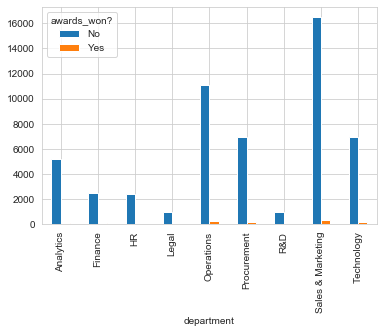

In [78]:
awards.plot.bar()

In [79]:
df2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,female,sourcing,1,35,5.0,8,Good,No,49,NO
1,65141,Operations,region_22,Bachelor's,male,other,1,30,5.0,4,Not_good,No,60,NO
2,7513,Sales & Marketing,region_19,Bachelor's,male,sourcing,1,34,3.0,7,Not_good,No,50,NO
3,2542,Sales & Marketing,region_23,Bachelor's,male,other,2,39,1.0,10,Not_good,No,50,NO
4,48945,Technology,region_26,Bachelor's,male,other,1,45,3.0,2,Not_good,No,73,NO


### Education background of the male and female employees

gender            female   male
education                      
Bachelor's         11122  27236
Below Secondary      295    542
Master's & above    4895  10718
AxesSubplot(0.125,0.125;0.775x0.755)


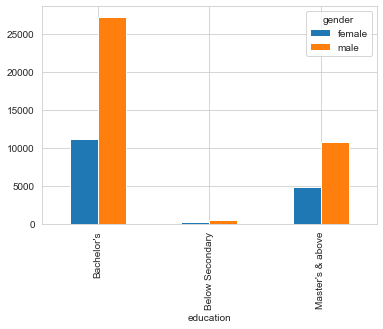

In [80]:
print(pd.crosstab(df2['education'], df2['gender']))

print(pd.crosstab(df2['education'], df2['gender']).plot.bar())

### Emmployees from different gender comimg from differnet recruitment channel

gender               female   male
recruitment_channel               
other                  9155  21291
referred                314    828
sourcing               6843  16377
AxesSubplot(0.125,0.125;0.775x0.755)


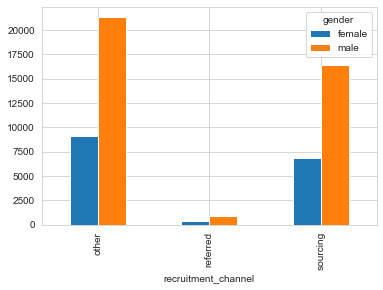

In [81]:
print(pd.crosstab(df2['recruitment_channel'], df2['gender']))

print(pd.crosstab(df2['recruitment_channel'], df2['gender']).plot.bar())

In [82]:
df2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,female,sourcing,1,35,5.0,8,Good,No,49,NO
1,65141,Operations,region_22,Bachelor's,male,other,1,30,5.0,4,Not_good,No,60,NO
2,7513,Sales & Marketing,region_19,Bachelor's,male,sourcing,1,34,3.0,7,Not_good,No,50,NO
3,2542,Sales & Marketing,region_23,Bachelor's,male,other,2,39,1.0,10,Not_good,No,50,NO
4,48945,Technology,region_26,Bachelor's,male,other,1,45,3.0,2,Not_good,No,73,NO


### Is there any relation between length of service and the average training score of the employees

(0, 102.10581949176665)

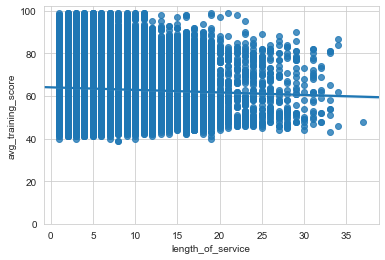

In [86]:
sns.regplot(x = 'length_of_service', y = 'avg_training_score', data = df2)
plt.ylim(0)

As the curve is pretty parallel here we can conclude that there not much correlation the above mentioned variables

### Is there any relation between age and the average training score of the employees

(0, 102.10581949176665)

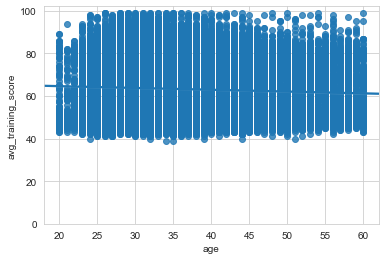

In [87]:
sns.regplot(x = 'age', y = 'avg_training_score', data = df2)
plt.ylim(0)

The curve here is pretty parallel to the x-axis as well which means that with age the average_training_score doesnot change much

### Is there any relation between age and the length of service of the employees

(0, 38.878303225876074)

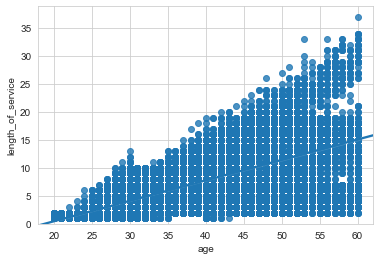

In [90]:
sns.regplot(x = 'age', y = 'length_of_service', data = df2)
plt.ylim(0)

Here it can be seen that there is a linear correlation between the variables  which is understandable as well , as the age increases the years of service in the company will increase too

## BIVARIATE ANALYSIS (Independent and Dependent Variable)

For the ease of analysis I have segregated the data frame grouping them on the basis of the **is_promoted** variable

In [91]:
df2 = df2.groupby('is_promoted')

Then I have retrieved the datarame where the employees are promoted. Now even if I perform univariate analysis on this dataframe I can find out the trends in the employees who are promoted

In [92]:
df_promoted = df2.get_group('YES')
df_promoted.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,female,sourcing,1,35,5.0,3,Good,No,50,YES
39,58304,Sales & Marketing,region_28,Bachelor's,male,sourcing,1,33,5.0,6,Good,No,51,YES
60,17673,Sales & Marketing,region_4,Master's & above,male,other,1,50,4.0,17,Good,No,47,YES
66,77981,Finance,region_22,Bachelor's,male,other,1,27,5.0,1,Good,Yes,58,YES
67,16502,Sales & Marketing,region_22,Bachelor's,male,sourcing,1,27,1.0,1,Not_good,No,61,YES


The employees who are not promoted are put into a seperate dataframe

In [94]:
df_not_promoted = df2.get_group('NO')
df_not_promoted.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,female,sourcing,1,35,5.0,8,Good,No,49,NO
1,65141,Operations,region_22,Bachelor's,male,other,1,30,5.0,4,Not_good,No,60,NO
2,7513,Sales & Marketing,region_19,Bachelor's,male,sourcing,1,34,3.0,7,Not_good,No,50,NO
3,2542,Sales & Marketing,region_23,Bachelor's,male,other,2,39,1.0,10,Not_good,No,50,NO
4,48945,Technology,region_26,Bachelor's,male,other,1,45,3.0,2,Not_good,No,73,NO


Now i can work on the dataframe which contains information about the promoted employees to uncover trends from it

Few questions that can be addressed here are:


### From which department does maximum promotion take place?

In [135]:
df_promoted['department'].mode()

0    Sales & Marketing
dtype: object

### From which department maximum employees doesnot get promoted?

In [131]:
df_not_promoted['department'].mode()

0    Sales & Marketing
dtype: object

This is pretty obvious as well as the maximum number of employees work in the department of **Sales and Marketing** only

### Recruitment channel for male and  female employees who got promoted

In [148]:
pd.crosstab(df_promoted['recruitment_channel'], df_promoted['gender'])

gender,female,male
recruitment_channel,,
other,805,1751
referred,45,93
sourcing,617,1357


### What is the female to male ratio in different departments among the  employees who got promoted

In [95]:
gender_ratio = pd.crosstab(df_promoted['department'],df_promoted['gender'])
gender_ratio

gender,female,male
department,,
Analytics,62,450
Finance,55,151
HR,58,78
Legal,6,47
Operations,442,581
Procurement,385,303
R&D,6,63
Sales & Marketing,176,1037
Technology,277,491


In [119]:
gender_ratio['female_ratio'] = gender_ratio['female']/rati['female']
gender_ratio

gender,female,male,female_ratio
department,,,
Analytics,62,450,0.120858
Finance,55,151,0.080764
HR,58,78,0.057654
Legal,6,47,0.040268
Operations,442,581,0.094505
Procurement,385,303,0.117128
R&D,6,63,0.105263
Sales & Marketing,176,1037,0.055802
Technology,277,491,0.099354


In [156]:
gender_ratio['male_ratio'] = gender_ratio['male']/rati['male']
gender_ratio

gender,female,male,female_ratio,male_ratio
department,,,,
Analytics,62,450,0.120858,0.092994
Finance,55,151,0.080764,0.081402
HR,58,78,0.057654,0.055241
Legal,6,47,0.040268,0.052809
Operations,442,581,0.094505,0.087093
Procurement,385,303,0.117128,0.078681
R&D,6,63,0.105263,0.066879
Sales & Marketing,176,1037,0.055802,0.075771
Technology,277,491,0.099354,0.112874


The final gender_ratio table gives us the number of male and female employees in respective departments who got promoted and their ratios as well. The ratios tell us that out of the total male and female in the different departments what percentage got promoted

### What is the  education background of the promoted employees

In [124]:
df_promoted['education'].value_counts()

Bachelor's          3093
Master's & above    1505
Below Secondary       70
Name: education, dtype: int64

### What is the trend  education background of the  female and male  employees who got promoted

In [128]:
z = pd.crosstab(df_promoted['education'],df_promoted['gender'])
z

gender,female,male
education,,
Bachelor's,938,2155
Below Secondary,22,48
Master's & above,507,998


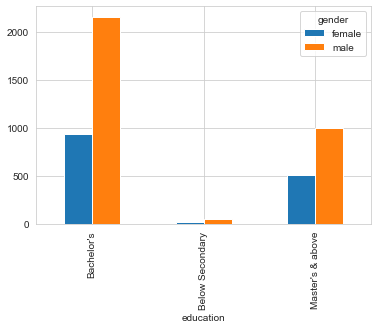

In [129]:
z.plot.bar()

### How much does the KPI being greater than 80%  affect promotion

This can be answered by exploring the dataframe **df_promoted**


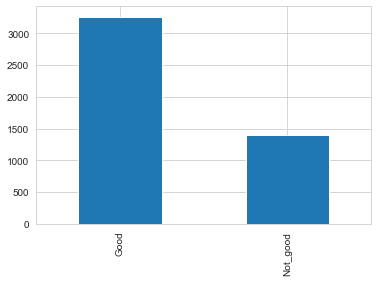

In [137]:
df_promoted['KPIs_met >80%'].value_counts().plot.bar()

From this one this very clear, for getting promoted it is very necessary to keep your **KPI above 80%** if you are an employee of this company

In order to get a grab of the trends in the continuous variables I have used the **.describe()** function on the **df_promoted**

In [138]:
df_promoted.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
count,4668.000000,4668.000000,4668.000000,4668.000000,4668.000000,4668.000000
mean,39285.092331,1.203299,34.372965,3.937018,5.716367,71.325193
std,22754.632174,0.513805,7.081449,1.082170,4.007772,14.746122
min,39.000000,1.000000,20.000000,1.000000,1.000000,41.000000
25%,19390.500000,1.000000,29.000000,3.000000,3.000000,59.000000
50%,39439.500000,1.000000,33.000000,4.000000,5.000000,71.000000
75%,59082.250000,1.000000,38.000000,5.000000,7.000000,84.000000
max,78292.000000,6.000000,60.000000,5.000000,34.000000,99.000000


So the trends that canbe seen are as follows:

For getting promoted it is mandatory to do 1 training atleast

The promoted employees are general pretty young with an average age of about 35 years

The promoted employees have a decent training sore for previous year where maximum of them getting around 4

The promoted employees have near about served the company for 6 years

They have a pretty good training score this year as well around 70s


### How much does winning awards affect promotion

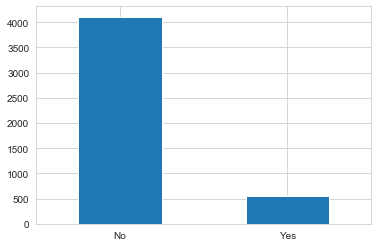

In [147]:
df_promoted['awards_won?'].value_counts().plot.bar()
plt.xticks(rotation = 360)
plt.show()

Here we can conclude that winning award might be good for your service book but doesnot affect promotion that much if you are an employee of this company

#### This was a try from my side to bring out the important facts from the data to ease decision making and to make an appropriate model out of it to predict , given the required parameters , whether an employee will be promoted by the company or not

#### EDA can be done on a varied ways, it depends on what questions we are trying to answer or what trends are we looking for in the data